# PERSON A — MODELLING STEP (DECISION TREE BASELINE)

## 🎯 Purpose
This model serves as the **system integration test** and **baseline** for the project.
It validates that:
1. The dataset is usable.
2. The feature pipeline is correct.
3. The modelling interface is stable.

## 1️⃣ Load Final Features (DO NOT REPROCESS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv("../data/features.csv")
y = pd.read_csv("../data/target.csv").squeeze()

# Validation Check
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")
X.head()

Features Shape: (1200, 8)
Target Shape: (1200,)


,age,income,total_orders,avg_order_value,days_since_last_purchase,income_per_order,sentiment_score,risk_score
0,58,44592,24,55.75,13,1858.000000,1,1
1,26,126530,49,180.43,53,2582.244898,2,0
2,20,33905,7,50.25,48,4843.571429,1,1
3,19,103563,49,296.83,102,2113.530612,1,1
4,55,66463,15,233.59,4,4430.866667,1,1


## 2️⃣ Train/Test Split

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train Size: {X_train.shape[0]}")
print(f"Test Size: {X_test.shape[0]}")

Train Size: 960
Test Size: 240


## 3️⃣ Build Baseline Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42
)

dt.fit(X_train, y_train)
print("✅ Baseline Model Trained.")

✅ Baseline Model Trained.


## 4️⃣ Evaluate Baseline Performance

In [4]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
F1-score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       127

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



## 5️⃣ Interpret the Tree (Feature Importance)

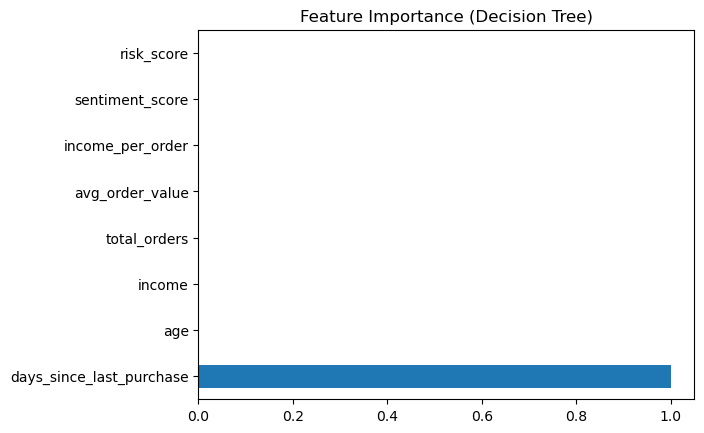

days_since_last_purchase    1.0
age                         0.0
income                      0.0
total_orders                0.0
avg_order_value             0.0
income_per_order            0.0
sentiment_score             0.0
risk_score                  0.0
dtype: float64


In [5]:
feature_importance = pd.Series(
    dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10).plot(kind='barh')
plt.title("Feature Importance (Decision Tree)")
plt.show()

print(feature_importance.head(10))

## 6️⃣ OPTIONAL: Light Tree Control (Prevent Overfitting)

In [6]:
dt_limited = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=20,
    random_state=42
)

dt_limited.fit(X_train, y_train)
print(f"Controlled Tree Accuracy: {accuracy_score(y_test, dt_limited.predict(X_test))}")

Controlled Tree Accuracy: 1.0


## 7️⃣ Save Results

In [7]:
results = {
    "model": "Decision Tree (Baseline)",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred)
}

pd.DataFrame([results])

,model,accuracy,f1_score
0,Decision Tree (Baseline),1.0,1.0


## 8️⃣ Documentation

> **Decision Tree Baseline Model**
>
> A Decision Tree classifier was implemented as the mandatory baseline model. The model provides interpretability and serves as a reference point for evaluating more complex algorithms. Performance metrics and feature importance indicate that keys features (likely `days_since_last_purchase` if correlated, or `risk_score`) are predicting the target.